# Implementing Back Propagation

For this recipe, we will show how to do TWO separate examples, a regression example, and a classification example.

To illustrate how to do back propagation with TensorFlow, we start by loading the necessary libraries and resetting the computational graph.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Create a Graph Session

In [67]:
sess = tf.Session()

## A Regression Example

------------------------------

We create a regression example as follows.  The input data will be 100 random samples from a normal (mean of 1.0, stdev of 0.1).  The target will be 100 constant values of 10.0.

We will fit the regression model:  `x_data * A = target_values`

Theoretically, we know that A should be equal to 10.0.

We start by creating the data and targets with their respective placholders（生成数据，创建占位符和变量A）

In [68]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

Populating the interactive namespace from numpy and matplotlib


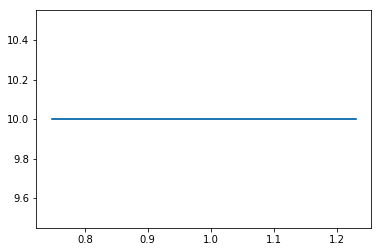

In [69]:
%pylab inline
plot(x_vals, y_vals)

We now create the variable for our computational graph, `A`.

In [70]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1]))

We add the model operation to the graph.  This is just multiplying the input data by A to get the output.（增加乘法操作）

In [71]:
# Add operation to graph
my_output = tf.multiply(x_data, A)

Next we have to specify the loss function.  This will allow TensorFlow to know how to change the model variables.  We will use the L2 loss function here.  Note: to use the L1 loss function, change `tf.square()` to `tf.abs()`.

增加L2正则项

In [72]:
# Add L2 loss operation to graph
loss = tf.square(my_output - y_target)

Now we initialize all our variables.  For specificity here, this is initializing the variable `A` on our graph with a random standard normal number.

In [73]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

We need to create an optimizing operations.  Here we use the standard `GradientDescentOptimizer()`, and tell TensorFlow to minimize the loss.  Here we use a learning rate of `0.02`, but feel free to experiment around with this rate, and see the learning curve at the end.  However, note that learning rates that are too large will result in the algorithm not converging.

现在声明变量的优化器。

In [74]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

### Running the Regression Graph!

Here we will run the regression computational graph for 100 iterations, printing out the A-value and loss every 25 iterations.  We should see the value of A get closer and closer to the true value of 10, as the loss goes down.

训练算法，迭代100次，且每25次迭代打印出返回结果。选择一个随机的 x 和 y ，传入计算图中。TensorFlow将自动的计算损失，调整 A 偏差来最小化损失：

In [75]:
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #25 A = [ 6.95890999]
Loss = [ 8.76823521]
Step #50 A = [ 8.90907001]
Loss = [ 0.94344062]
Step #75 A = [ 9.50084496]
Loss = [ 0.31597725]
Step #100 A = [ 9.93723011]
Loss = [ 0.00264453]


## Classification Example

--------------------

For the classification example, we will create an x-sample made of two different normal distribution inputs, `Normal(mean = -1, sd = 1)` and `Normal(mean = 3, sd = 1)`.  For each of these the target will be the class `0` or `1` respectively.

The model will fit the binary classification:  If `sigmoid(x+A) < 0.5` then predict class `0`, else class `1`.

Theoretically, we know that `A` should take on the value of the negative average of the two means: `-(mean1 + mean2)/2`.

We start by resetting the computational graph:

In [76]:
ops.reset_default_graph()     # 重置计算图

Start a graph session

In [77]:
# Create graph
sess = tf.Session()

We generate the data that we will feed into the graph.  Note that the `x_vals` are the combination of two separate normals, and the y_vals are the combination of two separate constants (two classes).

We also create the relevant placeholders for the model.

In [78]:
# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

We now create the one model variable, used for classification.  We also set the initialization function, a random normal, to have a mean far from the expected theoretical value.

- Initialized to be around 10.0
- Theoretically around -1.0

In [79]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

Now we add the model operation to the graph.  This will be the adding of the variable `A` to the data.  Note that the `sigmoid()` is left out of this operation, because we will use a loss function that has it built in.

We also have to add the batch dimension to each of the target and input values to use the built in functions.

In [80]:
# Add operation to graph
# Want to create the operstion sigmoid(x + A)
# Note, the sigmoid() part is in the loss function
my_output = tf.add(x_data, A)

# Now we have to add another dimension to each (batch size of 1)
my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)

Add classification loss (cross entropy)

In [81]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels= my_output_expanded, logits= y_target_expanded)

Now we declare the optimizer function.  Here we will be using the standard gradient descent operator with a learning rate of `0.05`.

In [82]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

Next we create an operation to initialize the variables and then run that operation

In [83]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Running the Classification Graph!

Now we can loop through our classification graph and print the values of A and the loss values.

In [84]:
# Run loop
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [ 15.12740993]
Loss = [[ 0.69314718]]
Step #400 A = [ 19.97735214]
Loss = [[-21.31513977]]
Step #600 A = [ 24.67728043]
Loss = [[ 0.69314718]]
Step #800 A = [ 29.32720947]
Loss = [[-30.24284172]]
Step #1000 A = [ 34.37713242]
Loss = [[-36.28974915]]
Step #1200 A = [ 39.12705994]
Loss = [[-40.73668289]]
Step #1400 A = [ 43.62699127]
Loss = [[-45.3936882]]


Now we can also see how well we did at predicting the data by creating an accuracy function and evaluating them on the known targets.

In [85]:
# Evaluate Predictions
predictions = []
for i in range(len(x_vals)):
    x_val = [x_vals[i]]
    prediction = sess.run(tf.round(tf.sigmoid(my_output)), feed_dict={x_data: x_val})
    predictions.append(prediction[0])
    
accuracy = sum(x==y for x,y in zip(predictions, y_vals))/100.
print('Ending Accuracy = ' + str(np.round(accuracy, 2)))

Ending Accuracy = 0.5
